# Customer Churn Prediction Model
## by Stephanie Solis
### Project Brief
This project uses scikit learn's logistic regression to predict the likelihood that a customer will leave a financial institution. It uses a [dataset available on Kaggle](https://www.kaggle.com/datasets/kartiksaini18/churn-bank-customer) that contains data for about 10,000 customers.

## Part 0: Prepare the Data for Model Training

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Split the features from the target ('Exited')
X = df.drop(columns='Exited')
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
#Split the Target into y
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
#Split the data into test and train data; create 1st dataframes with Customer ID's for reference
X_train_id, X_test_id,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)
print(f'Shapes: \n   X_train_id: {X_train_id.shape}\n   y_train: {y_train.shape}\n   X_test_id: {X_test_id.shape}\n   y_test: {y_test.shape}')

Shapes: 
   X_train_id: (7500, 13)
   y_train: (7500,)
   X_test_id: (2500, 13)
   y_test: (2500,)


In [6]:
#Create X_train by removing data that won't be used as features
X_train = X_train_id.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9478,782,Germany,Female,53,1,81571.05,1,1,0,182960.46
3741,738,Germany,Female,29,9,139106.19,1,1,0,141872.05
178,597,Spain,Female,40,8,101993.12,1,0,1,94774.12
3195,697,Germany,Male,29,0,172693.54,1,0,0,141798.98
7864,588,Spain,Male,33,2,0.00,2,1,1,12483.56


In [7]:
#Create X_test by removing data that won't be used as features
X_test = X_test_id.drop(columns=['RowNumber','CustomerId','Surname'])
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
757,736,Spain,Female,28,2,0.00,2,1,1,117431.10
1003,646,France,Female,42,3,175159.90,2,0,0,67124.48
8089,692,Germany,Male,24,2,120596.93,1,0,1,180490.53
2967,579,Germany,Female,39,5,117833.30,3,0,0,5831.00
5011,480,Spain,Male,47,8,75408.33,1,1,0,25887.89


In [8]:
#verify compatible shapes for train/test data
print(f'Shapes: \n   X_train: {X_train.shape}\n   y_train: {y_train.shape}\n   X_test: {X_test.shape}\n   y_test: {y_test.shape}')

Shapes: 
   X_train: (7500, 10)
   y_train: (7500,)
   X_test: (2500, 10)
   y_test: (2500,)


In [9]:
#One-hot encode categorical columns; train
X_train_e = pd.get_dummies(X_train, columns=['Geography','Gender'],
                           prefix=['Geo','Gender_is_'])
X_train_e.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_is__Female,Gender_is__Male
9478,782,53,1,81571.05,1,1,0,182960.46,0,1,0,1,0
3741,738,29,9,139106.19,1,1,0,141872.05,0,1,0,1,0
178,597,40,8,101993.12,1,0,1,94774.12,0,0,1,1,0
3195,697,29,0,172693.54,1,0,0,141798.98,0,1,0,0,1
7864,588,33,2,0.00,2,1,1,12483.56,0,0,1,0,1


In [10]:
#One-hot encode categorical columns; test
X_test_e = pd.get_dummies(X_test, columns=['Geography','Gender'],
                           prefix=['Geo','Gender_is_'])
X_test_e.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_is__Female,Gender_is__Male
757,736,28,2,0.00,2,1,1,117431.10,0,0,1,1,0
1003,646,42,3,175159.90,2,0,0,67124.48,1,0,0,1,0
8089,692,24,2,120596.93,1,0,1,180490.53,0,1,0,0,1
2967,579,39,5,117833.30,3,0,0,5831.00,0,1,0,1,0
5011,480,47,8,75408.33,1,1,0,25887.89,0,0,1,0,1


## Part 1: Build Logistic Regression Model

In [11]:
lr_model = LogisticRegression(random_state=5)
lr_model.fit(X_train_e,y_train)

LogisticRegression(random_state=5)

In [12]:
#Predict outcomes on the test data and score the model accuracy
predictions=lr_model.predict_proba(X_test_e)
print(predictions)
lr_model.score(X_test_e,y_test)

[[0.93214828 0.06785172]
 [0.70332704 0.29667296]
 [0.90225826 0.09774174]
 ...
 [0.60263021 0.39736979]
 [0.81233557 0.18766443]
 [0.86829819 0.13170181]]


0.7948

In [13]:
#Check predictions
prob_stay = predictions[:,0]
prob_exit = predictions[:,1]
prob_exit

array([0.06785172, 0.29667296, 0.09774174, ..., 0.39736979, 0.18766443,
       0.13170181])

In [14]:
#calculate & print AUC
lr_pred_prob = lr_model.predict_proba(X_test_e)[:,1]
lr_auc = roc_auc_score(y_test, lr_pred_prob)
print(lr_auc)

0.6748959446765782


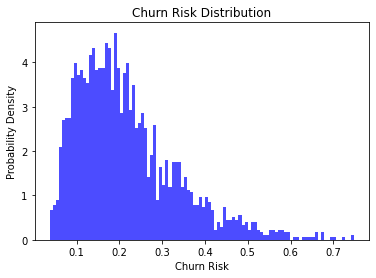

In [15]:
plt.hist(prob_exit, bins=100, density=True, alpha=.7, color='blue')
plt.xlabel('Churn Risk')
plt.ylabel('Probability Density')
plt.title('Churn Risk Distribution')
plt.show()

## Part 2: Categorize Churn Risk and Save List

Based on the Churn Risk Distribution above, let's classify churn risk as such:

- 1: Low churn risk. 0 - <.2
- 2: Mild churn risk. 0.2 - <0.3
- 3: Moderate churn risk. 0.3 - <0.4
- 4: High churn risk. >=0.4

In [16]:
prob_exit.shape

(2500,)

In [17]:
X_test_id.shape

(2500, 13)

In [18]:
#Bring test data with customerID back in & merge with predictions
results = X_test_id.copy()
results['Exit_Pred'] = prob_exit.copy()
results.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exit_Pred
757,758,15815364,Ashley,736,Spain,Female,28,2,0.00,2,1,1,117431.10,0.067852
1003,1004,15701301,Murphy,646,France,Female,42,3,175159.90,2,0,0,67124.48,0.296673
8089,8090,15623357,Onio,692,Germany,Male,24,2,120596.93,1,0,1,180490.53,0.097742
2967,2968,15595324,Daniels,579,Germany,Female,39,5,117833.30,3,0,0,5831.00,0.312845
5011,5012,15609011,Barry,480,Spain,Male,47,8,75408.33,1,1,0,25887.89,0.467987


In [20]:
buckets = [0, .2, .3, .4, 1]
risk_categories = ['Low', 'Mild','Moderate','High']
results.loc[:,'Churn_Risk'] = pd.cut(results['Exit_Pred'],bins=buckets,labels=risk_categories,
                             include_lowest=True)
results.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exit_Pred,Churn_Risk
757,758,15815364,Ashley,736,Spain,Female,28,2,0.00,2,1,1,117431.10,0.067852,Low
1003,1004,15701301,Murphy,646,France,Female,42,3,175159.90,2,0,0,67124.48,0.296673,Mild
8089,8090,15623357,Onio,692,Germany,Male,24,2,120596.93,1,0,1,180490.53,0.097742,Low
2967,2968,15595324,Daniels,579,Germany,Female,39,5,117833.30,3,0,0,5831.00,0.312845,Moderate
5011,5012,15609011,Barry,480,Spain,Male,47,8,75408.33,1,1,0,25887.89,0.467987,High


In [21]:
results = results.drop(results.columns.difference(['CustomerId','Exit_Pred','Churn_Risk']), 
                       axis=1)
results = results.sort_values(by='Exit_Pred',ascending=False)
results.head()

,CustomerId,Exit_Pred,Churn_Risk
2473,15679249,0.748700,High
2901,15603246,0.747030,High
7138,15809837,0.727132,High
3462,15713596,0.705057,High
1981,15630913,0.696260,High


In [22]:
results.to_csv('customers_by_churn_risk.csv', index=False)